In [272]:
using LinearAlgebra
using Zygote
using Zygote: @ignore
i32 = Int32
i64 = Int64
f32 = Float32
f64 = Float64;

In [381]:
function relu(x::T)::T where T
    x < zero(x) ? zero(x) : x
end
function clip(x::T)::T where T
    x < zero(x) ? zero(x) : x > one(x) ? one(x) : x
end

clip (generic function with 1 method)

In [662]:
struct Quadratic <: Function
    W::Matrix{Float32}
    b::Vector{Float32}
    function Quadratic(n::Integer)
        W = randn(Float32, n, n)
        W = W'W
        b = randn(Float32, n)
        return new(W, b)
    end
end
(q::Quadratic)(x) = sum((q.W'x).*x, dims=1) .+ q.b'x

In [663]:
function rand_cube(p)
    return 2.f0 * (rand(f32, size(p)) .< p) .- 1.f0
end

rand_cube (generic function with 1 method)

In [664]:
function E(fun, gen, p, n=100)
    return sum(fun(gen(p)) for _ in 1:n)/n
end

E (generic function with 3 methods)

In [665]:
function cube(n)
    if n == 1
        return f32[-1, 1]'
    end
    prev = cube(n - 1)'
    return [(1:2^n .> 2^(n-1)) [prev ; prev]]'
end        

cube (generic function with 1 method)

In [666]:
k = 3
n = 16
c = 2cube(k) .- 1.f0
q = Quadratic(k)

(::Quadratic) (generic function with 1 method)

In [710]:
p = rand(k)
for i in 1:10
    ifprint = i % 1 == 0
    g = gradient(Params([p])) do
        Y = q(c)
        w = prod(p .* c .+ relu.(-c), dims=1)
        L = sum(Y .* w)
        @ignore ifprint && println("L = $L")
        L
    end
    p .-= 0.1g[p]
    p .= clip.(p)
end

L = 51.93832700519082
L = 23.91541589374009
L = 6.650803089141846
L = 6.650803089141846
L = 6.650803089141846
L = 6.650803089141846
L = 6.650803089141846
L = 6.650803089141846
L = 6.650803089141846
L = 6.650803089141846


In [711]:
p

3-element Vector{Float64}:
 0.0
 1.0
 1.0

In [716]:
p = rand(f32, 3) # f32[0.5, 0.5, 0.5]
println(p)
m = zeros(f32, k)
α = 0.01f0
n = 32
for i in 1:1000
    ifprint = i % 10 == 0
    ∇ = 0
    Ls = []
    for _ in 1:n
        r = rand_cube(p)
        g = gradient(Params([p])) do
            L = sum(log.(ifelse.(r .== 1, p, 1.f0 .- p) .+ 0.001f0))
            @ignore ifprint && push!(Ls, L)
            L
        end
        ∇ = ∇ .+ g[p] * sum(q(r))
    end
    ifprint && println(sum(Ls)/n)
    ∇ /= n
    # m = (1.f0 - α) * m + α * g
    p .-= 0.001∇
    p .= clip.(p)
    # @show p
end

Float32[0.5530135, 0.40168446, 0.82255393]
-1.856694
-1.8507309
-1.8644279
-1.5559881
-1.2668172
-1.1053274
-1.002292
-1.024529
-0.3933375
-0.51843
-0.2487632
-0.14788218
-0.055074334
-0.2699407
-0.025179343
-0.3438483
-0.17715536
-0.16356897
-0.1634504
-0.40909463
-0.031240163
-0.42673087
-0.049387664
-0.16190648
-0.1611573
-0.24712032
-0.17365792
-0.14876162
-0.19256029
-0.2876674
-0.74783987
-0.16610968
-0.30942237
-0.14927632
-0.16271636
-0.1420409
-0.24159147
-0.18029654
-0.021817094
-0.15708894
-0.1587493
-0.05095473
-0.05587241
-0.29131114
-0.020313619
-0.39386374
-0.032477066
-0.046017602
-0.17212874
-0.41870087
-0.18389021
-0.38352686
-0.30969435
-0.30519837
-0.26325285
-0.15434173
-0.038049694
-0.15404323
-0.5913596
-0.16329776
-0.3990767
-0.06315574
-0.17482252
-0.19166647
-0.37548456
-0.41499785
-0.04076405
-0.5234873
-0.15539974
-0.022643168
-0.15683226
-0.27279213
-0.17998597
-0.06739544
-0.15171058
-0.150683
-0.034210257
-0.3833864
-0.17455135
-0.29999408
-0.1620003
-0.0

In [717]:
p

3-element Vector{Float32}:
 0.019090345
 0.9949694
 0.9855929

In [718]:
q(p)

1-element Vector{Float32}:
 6.1443267

In [719]:
q(1 .- p)

1-element Vector{Float32}:
 2.1361282

In [720]:
using Plots

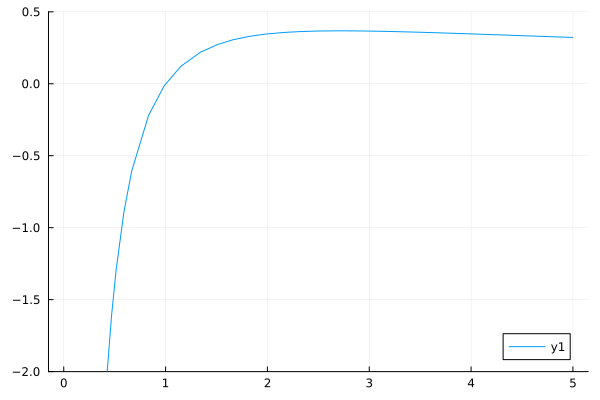

In [730]:
plot(x -> log(x) / x)
ylims!(-2, 0.5)